In [25]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

ERROR: Could not find a version that satisfies the requirement MatplotlibDrawer (from versions: none)
ERROR: No matching distribution found for MatplotlibDrawer


# Initialization
## OBS - Needed for Colab

In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
import math
import qiskit
from qiskit import qasm3
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_qsphere
from qiskit import transpile
from qiskit.visualization import plot_state_city, plot_histogram
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

## Qiskit version used in this lab

In [18]:
qiskit.__version__

'1.3.1'

# Demo 1 - A QUBIT is the equivalent of a BIT on classiclacomputing, but against a BIT, that can have just two states, a quantum computer can have multiple states. When read, QUBIT has two stables states, defined as 0 and 1. So is impossible to "verify" if QUBIT is in superposition.

## OBS - Change the code bellow to express different positions on BlockSphere. Try to rotate on X, Y and Z to explore different positions

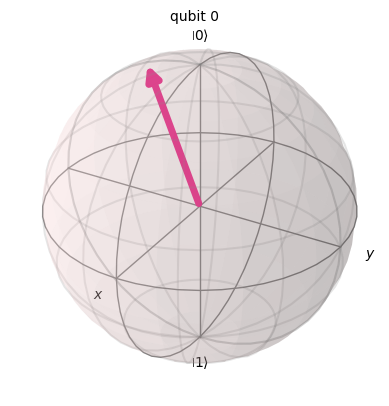

In [59]:
qc = QuantumCircuit(1,1)
#qc.h(0)
qc.rx(math.pi / 8 , 0)
#qc.rz(math.pi /2, 0)
#qc.ry(math.pi / 2, 0)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
plot_bloch_multivector(qc)

# Demo 1 - Cada uma das instruções permitem  rotações em torno dos eixos. Temos instruções para rotação nos eixos X, Y e Z

## OBS: Explore that after put on superposition, whe can use Z axis to rotate and make Arithmetic using angles

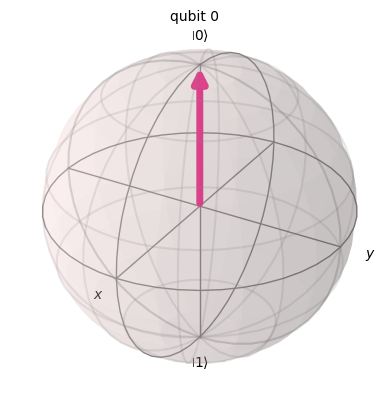

In [60]:
qc = QuantumCircuit(1,1)
qc.rz(math.pi / 4, 0)
plot_bloch_multivector(qc)

# Demo 1 - Show that any position can be made, but when read, the QUBIT goes to one of stable states

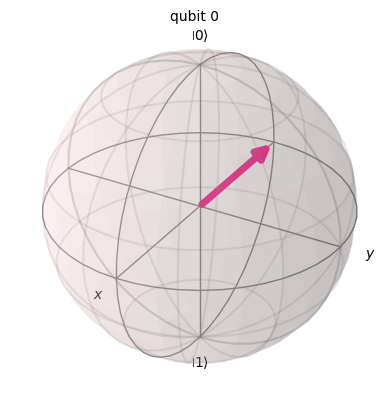

In [61]:
qc = QuantumCircuit(1,1)
qc.rx(math.pi / 2, 0)
qc.rz(3 * math.pi/2, 0)
plot_bloch_multivector(qc)

# Demo 2 - Explain that in hadamard you have equal probability to have 0 and 1 when read. Explore that put hadamard from 0 is different from hadamard from 1 (because operations should be invertible)


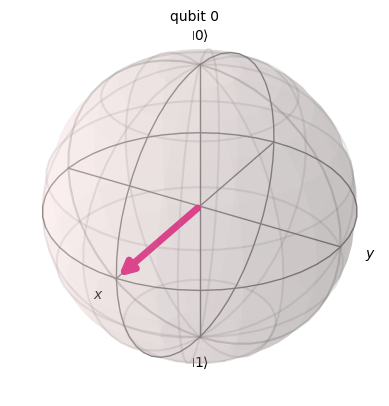

In [62]:
circ = QuantumCircuit(1)
circ.h(0)
# circ.measure_all()
# simulator = BasicSimulator()
# result = simulator.run(circ).result()
# counts = result.get_counts()
# print(counts)
plot_bloch_multivector(circ)

## Demo 2 - Explore the construction of a QuantumCircuit. Whe can define the number of QUBITS and CLACBITS (classic bits)

In [63]:
from qiskit import *
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(0)
qc.measure_all()
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

{'0 0': 507, '1 0': 517}


### Demo 3 - Entanglement is important to simulate other logic GATES and is important for computation. Perhaps uncoment parts of code to show how the results are presented.

In [64]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.draw(style={'backgroundcolor': '#EEEEEE'})
# circ.measure_all()
# simulator = BasicSimulator()
# result = simulator.run(circ).result()
# counts = result.get_counts()
# print(counts)

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [65]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(2)
circ.h(1)
circ.cx(1,0)
circ.draw(style={'backgroundcolor': '#EEEEEE'})

┌───┐
q_0: ─────┤ X ├
     ┌───┐└─┬─┘
q_1: ┤ H ├──■──
     └───┘

# Demo 4 - Porta X - inversor

## Remember that initialy on start all values are 0 for QUBITS. It is possible to invert to get 1 instead

In [66]:
qc = QuantumCircuit(1)
qc.x(0)
qc.measure_all()
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'1': 1024}


## Demo 4 - Quantum computers operate in conjunction with classical computers, so there is a conversion from QUBIT to CBIT using measure operator.

In [67]:
q = QuantumRegister(3, name="qubit")
c = ClassicalRegister(3, name="cbit")
qc = QuantumCircuit(q, c)
qc.measure([0,1], [0,1])
qc.draw(style={'backgroundcolor': '#EEEEEE'})

┌─┐   
qubit_0: ┤M├───
         └╥┘┌─┐
qubit_1: ─╫─┤M├
          ║ └╥┘
qubit_2: ─╫──╫─
          ║  ║ 
 cbit: 3/═╩══╩═
          0  1

## Demo 5 - CBIT just have values 0 or 1.

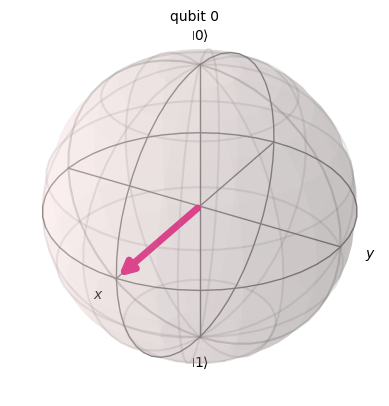

In [68]:
qc = QuantumCircuit(1)
qc.h(0)
# qc.measure_all()
# simulator = AerSimulator()
# result = simulator.run(qc).result()
# counts = result.get_counts()
# print(counts)
plot_bloch_multivector(qc)

## Demo 6 - Rotating on X, Y and Z you can have possibilities to represent distinct values


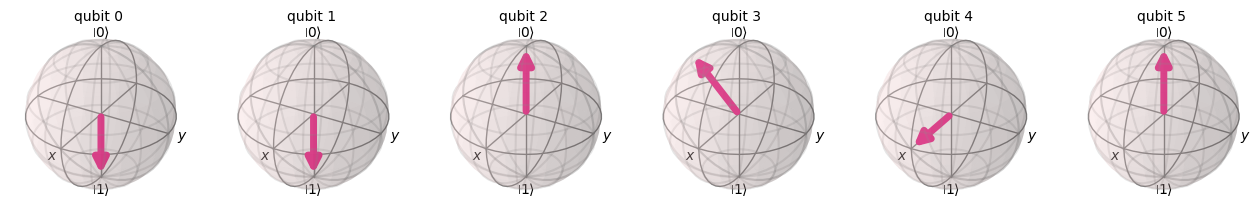

In [69]:
qc = QuantumCircuit(6)
qc.x(0)
qc.y(1)
qc.z(2)
qc.rx(math.pi /4, 3)
qc.ry(math.pi /2, 4)
qc.rz(math.pi * 2, 5)
# qc.measure_all()
# simulator = BasicSimulator()
# result = simulator.run(qc).result()
# counts = result.get_counts()
# print(counts)
plot_bloch_multivector(qc)

## Demo 6 - Multi QUBIT GATES allow to construct even more powerfull representations.

In [70]:
qc = QuantumCircuit(3)
qc.cx(0, 1)
qc.cy(0,1)
qc.cz(0,1)
qc.swap(0,1)
qc.ccx(0,1,2)
qc.ch(0,1)
qc.draw(style={'backgroundcolor': '#EEEEEE'})

q_0: ──■────■───■──X───■────■──
     ┌─┴─┐┌─┴─┐ │  │   │  ┌─┴─┐
q_1: ┤ X ├┤ Y ├─■──X───■──┤ H ├
     └───┘└───┘      ┌─┴─┐└───┘
q_2: ────────────────┤ X ├─────
                     └───┘

## Demo 7 - With QUBITs is possible to construct any available GATE of traditional computation. For example, this circuit is equivalent to a NAND gate

In [71]:
qc = QuantumCircuit(3)
# qc.ccx(0, 1, 2)
# qc.x(2)
#qc.cx(0,1)
#qc.x(0)
qc.x([0,1])
qc.ccx(0,1,2)
qc.x(2)
qc.draw(style={'backgroundcolor': '#EEEEEE'})

┌───┐          
q_0: ┤ X ├──■───────
     ├───┤  │       
q_1: ┤ X ├──■───────
     └───┘┌─┴─┐┌───┐
q_2: ─────┤ X ├┤ X ├
          └───┘└───┘



## Demo 8 - Since yiu can have any logic GATE, is also possible to make math operations, like increment and decrement

In [72]:
# incremento
a = QuantumRegister(1, "A")
b = QuantumRegister(1, "B")
c = QuantumRegister(1, "C")
qc = QuantumCircuit(a,b,c)
qc.x(0)
qc.ccx(a,b,c)
qc.cx(a,b)
qc.x(a)
qc.draw(style={'backgroundcolor': '#EEEEEE'})
qc.measure_all()
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

#decremento
# qc = QuantumCircuit(a,b,c)
# qc.x(a)
# qc.cx(a,b)
# qc.ccx(a,b,c)
# qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})


{'010': 1024}


## Demo 8 - transform a number on negative number is also possible

In [73]:
# negativo
a = QuantumRegister(1, "A")
b = QuantumRegister(1, "B")
c = QuantumRegister(1, "C")
qc = QuantumCircuit(a,b,c)
qc.x(a)
qc.x(b)
qc.x(c)
qc.ccx(a,b,c)
qc.cx(a,b)
qc.x(a)
qc.draw(style={'backgroundcolor': '#EEEEEE'})
# qc.measure_all()
# simulator = AerSimulator()
# result = simulator.run(qc).result()
# counts = result.get_counts()
# print(counts)

┌───┐          ┌───┐
A: ┤ X ├──■────■──┤ X ├
   ├───┤  │  ┌─┴─┐└───┘
B: ┤ X ├──■──┤ X ├─────
   ├───┤┌─┴─┐└───┘     
C: ┤ X ├┤ X ├──────────
   └───┘└───┘

## Demo 8 - You can SUM two numbers A and B using QUBITS

In [74]:
# soma A = A + B
a1 = QuantumRegister(1, "A1")
a2 = QuantumRegister(1, "A2")
b1 = QuantumRegister(1, "B1")
b2 = QuantumRegister(1, "B2")
qc = QuantumCircuit(a1,a2,b1,b2)

qc.x(a1)
# qc.x(a2)
qc.x(b1)
# qc.x(b1)
# qc.x(b1)

qc.ccx(a1,b1,a2)
qc.cx(b1,a1)
qc.cx(b2,a2)

qc.measure_all()
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

# qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'0110': 1024}


## Demo 8 - Subtraction is also possible using QUBITS

In [75]:
# soma A = A + B
a1 = QuantumRegister(1, "A1")
a2 = QuantumRegister(1, "A2")
b1 = QuantumRegister(1, "B1")
b2 = QuantumRegister(1, "B2")
qc = QuantumCircuit(a1,a2,b1,b2)

# qc.x(a1)
# qc.x(a2)
# qc.x(b1)
# qc.x(b2)
# qc.x(b1)

qc.x(b1)
qc.x(b2)
qc.cx(b1,b2)
qc.x(b1)
qc.ccx(a1,b1,a2)
qc.cx(b1,a1)
qc.cx(b2,a2)

# qc.measure_all()
# simulator = AerSimulator()
# result = simulator.run(qc).result()
# counts = result.get_counts()
# print(counts)

qc.draw(style={'backgroundcolor': '#EEEEEE'})

┌───┐     
A1: ─────────────────■──┤ X ├─────
                   ┌─┴─┐└─┬─┘┌───┐
A2: ───────────────┤ X ├──┼──┤ X ├
    ┌───┐     ┌───┐└─┬─┘  │  └─┬─┘
B1: ┤ X ├──■──┤ X ├──■────■────┼──
    ├───┤┌─┴─┐└───┘            │  
B2: ┤ X ├┤ X ├─────────────────■──
    └───┘└───┘

## Demo 9 - One of real uses of QUBITs is superposition to generate random numbers

In [76]:
qc = QuantumCircuit(4)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.measure_all()
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'1101': 56, '1111': 66, '1110': 51, '1100': 69, '1001': 78, '0101': 62, '0100': 66, '0000': 67, '0010': 62, '0111': 64, '0011': 73, '1011': 54, '1010': 61, '0001': 58, '1000': 70, '0110': 67}


## Demo 10 - QFT - Quantum Fourier Transform
### QFT uses a superposition to start rotation on Z AXIS to generate values that represent angles, and them separate harmonics of an input signal. There is a lot of topics to explore on this representation

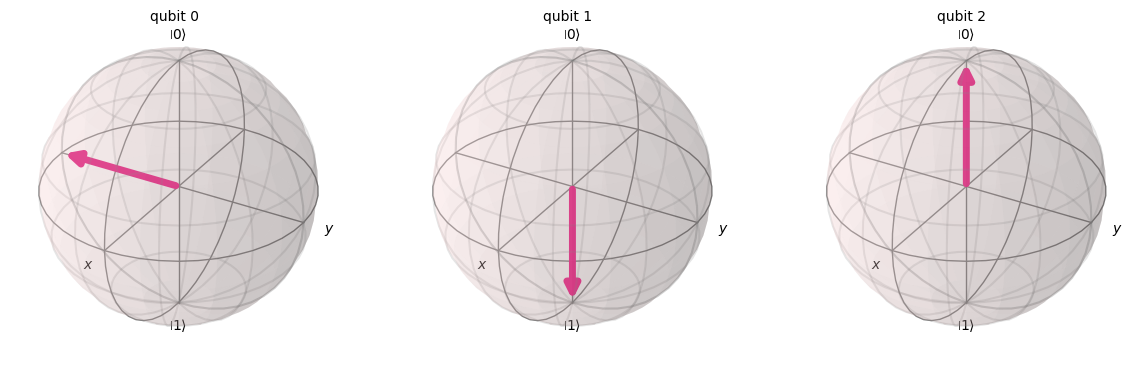

In [77]:
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)

qc.rz(math.pi /2, 0)
qc.rz(math.pi ,    1)
qc.rz(math.pi * 2, 2)


qc.h(2)
qc.crz(math.pi/2, 2, 1)
qc.crz(math.pi/4, 2, 0)
qc.h(1)
qc.crz(math.pi * 2, 1, 0)
qc.h(0)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
plot_bloch_multivector(qc)

## Demo 11 - Qiskit can support many hardware implemetations. To do this, is possible to define the topology of QUBITs for a particular hardware. We call this a MAP. This is an example of MAP used to represent a specific hardware.

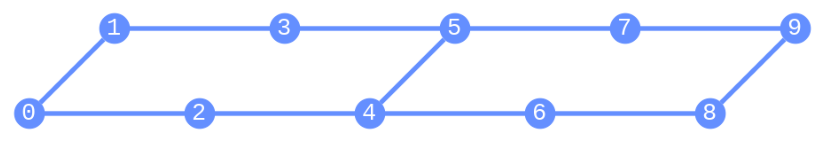

In [78]:
from qiskit.visualization import plot_coupling_map
num_qubits = 10

coupling_map = [[0,1],[1,3],[0,2],[2,4],[4,6], [6,8], [3,5], [5,7],[7,9], [4,5], [8,9]]
# conexões entre os QUBITS
qubit_coordinates = [[0,1], [1, 2], [0, 3], [1, 4], [0,5], [1,6], [0,7], [1,8], [0,9], [1,10]]
# camadas
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)

## Demo 11 - There are some instructions that could not be represented for some hardware. It is possible to decompose a circuit to use more "generic" and "simpler" instructions, providing a way run on limited or diferent hardwares. This is usually made internally by qiskit to run.

In [79]:
qc = QuantumCircuit (3)
qc.ccx (0,1,2)
qc.decompose().draw (style={'backgroundcolor': '#EEEEEE'}) #D - OK, BUT DECOMPOSE

┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

## Demo 11 - Group elements is possible, and the objective is to optimize the job for transpiler

In [80]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])
depth = qc.depth()
print(depth)
qc.draw(style={'backgroundcolor': '#EEEEEE'})

2


┌───┐ ░       ░ 
q_0: ┤ H ├─░───■───░─
     └───┘ ░ ┌─┴─┐ ░ 
q_1: ────────┤ X ├─░─
             └───┘ ░ 
q_2: ────────────────
                     
c: 3/════════════════

## Demo 11 - All QISKIT code is converted to an Assembler called QASM. This is the real code that executes on a real hardware

In [81]:
from qiskit.qasm3 import *
from qiskit.qasm3 import dumps
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.x(0)

print(dumps(qc))

OPENQASM 3.0;
include "stdgates.inc";
bit[1] c;
qubit[1] q;
h q[0];
x q[0];



## Demo 11 - It is also possible to make inverse, converting an Assembler code to a Qiskit high level set of instructions

In [82]:
qasm_str = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q -> c;
"""
# program = """
#     OPENQASM 3.0;
#     include "stdgates.inc";

#     input float[64] a;
#     qubit[3] q;
#     bit[2] mid;
#     bit[3] out;

#     let aliased = q[0:1];

#     gate my_gate(a) c, t {
#       gphase(a / 2);
#       ry(a) c;
#       cx c, t;
#     }
#     gate my_phase(a) c {
#       ctrl @ inv @ gphase(a) c;
#     }

#     my_gate(a * 2) aliased[0], q[{1, 2}][0];
#     measure q[0] -> mid[0];
#     measure q[1] -> mid[1];

#     while (mid == "00") {
#       reset q[0];
#       reset q[1];
#       my_gate(a) q[0], q[1];
#       my_phase(a - pi/2) q[1];
#       mid[0] = measure q[0];
#       mid[1] = measure q[1];
#     }

#     if (mid[0]) {
#       let inner_alias = q[{0, 1}];
#       reset inner_alias;
#     }

#     out = measure q;
# """

qc = QuantumCircuit.from_qasm_str(qasm_str)
qc.draw(style={'backgroundcolor': '#EEEEEE'})

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

## Demo 11 -  We can mix some statements of traditional programming language to make more Rich code using Qiskit

In [83]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)
with qc.switch(creg) as case:
    with case(0):
        qc.x(0)
    with case(1):
        qc.x(1)

qasm_string = qasm3.dumps(qc, experimental=qasm3.ExperimentalFeatures.SWITCH_CASE_V1)
print(qasm_string)

OPENQASM 3.0;
include "stdgates.inc";
bit[2] c4;
int switch_dummy;
qubit[2] q5;
switch_dummy = c4;
switch (switch_dummy) {
  case 0: {
    x q5[0];
  }
  break;
  case 1: {
    x q5[1];
  }
  break;
}



## Demo 12 - Qiskit has a Rich set of visual representations to provide graphics.

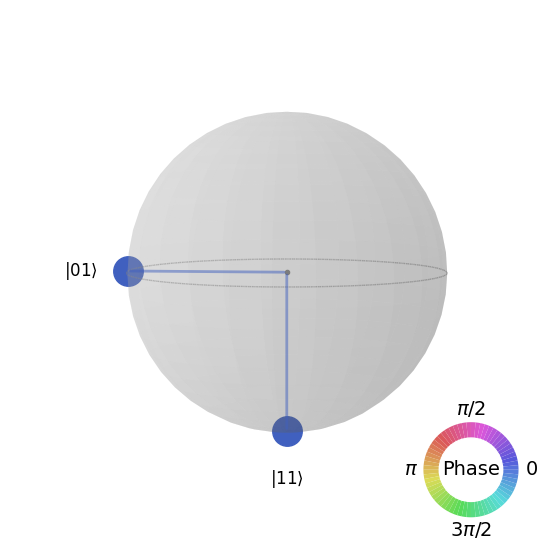

In [54]:
qc = QuantumCircuit(2)
qc.ry(math.pi, 0)
qc.h(1)

matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)

## Demo 12 - Not only individual representations, but also graphs like histograms are available to siulate a group of executions

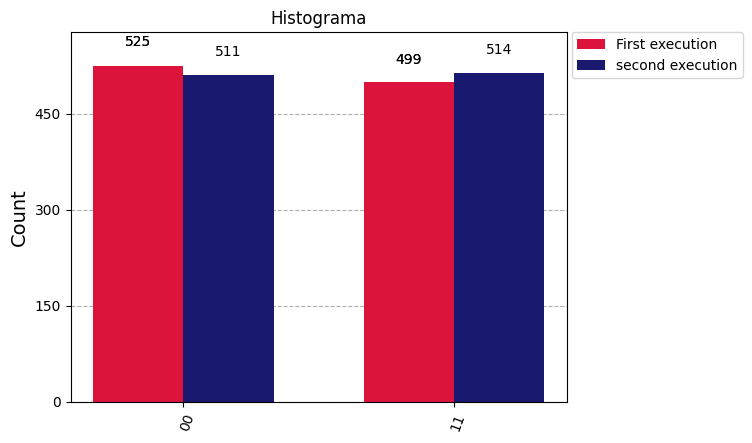

In [84]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.cx(0,1)

circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()

counts1 = {'00': 525, '11': 499}
counts2 = {'00': 511, '11': 514}

legend = ['First execution', 'second execution']

#plot_histogram([counts], legend=legend, color=['crimson'],  title="Histograma")
plot_histogram([counts1, counts2], legend=legend, color=['crimson', 'midnightblue'], title="Histograma")

## Demo 12 - State City is another kind of Graph available

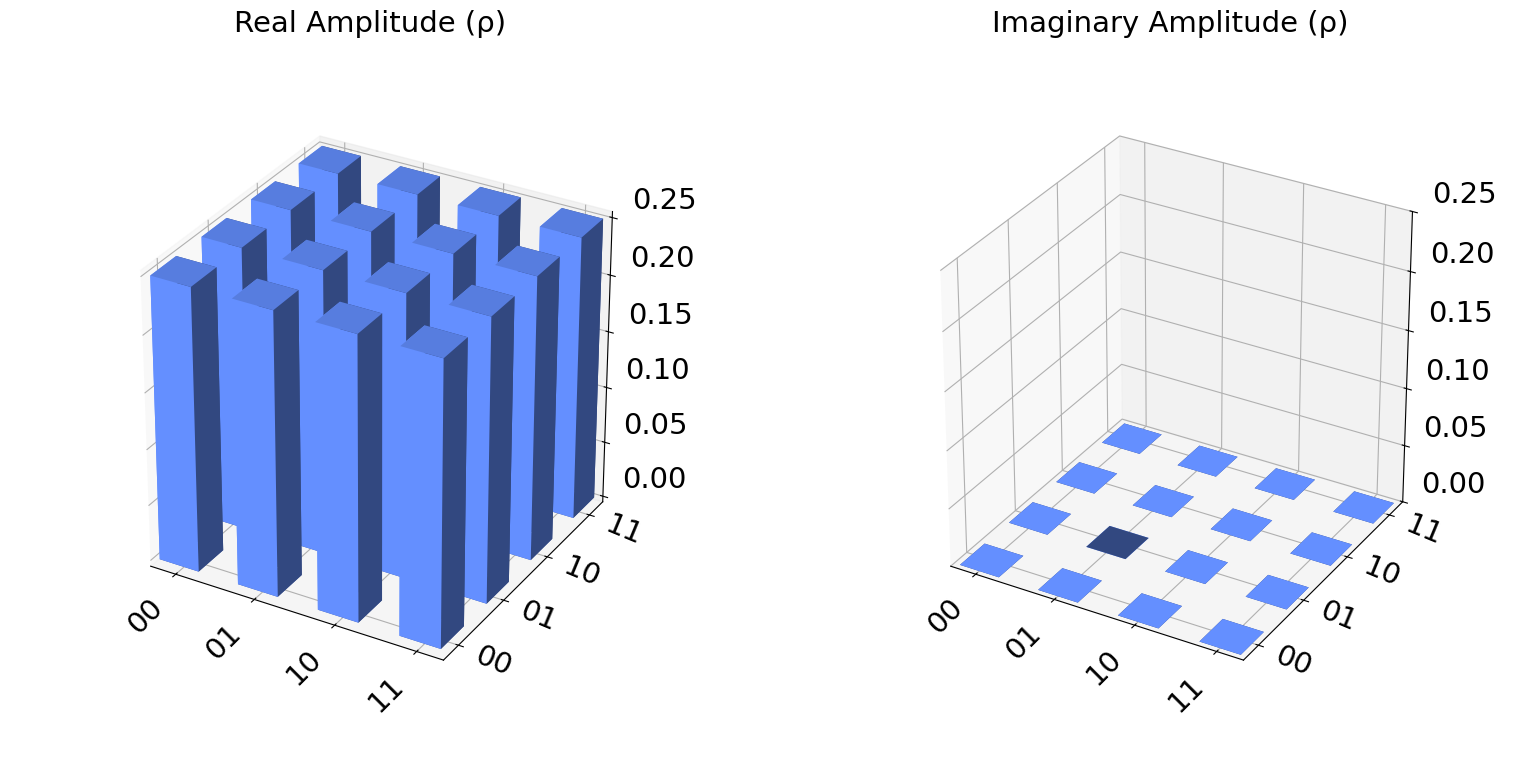

In [85]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.measure_all()

# Current
qc.remove_final_measurements()  # no measurements allowed
statevector = Statevector(qc)
plot_state_city(statevector)

## Demo 12 - States can be printed (similar to KET representation). This shows the probabilistic state of a QUBIT

In [86]:
from qiskit import QuantumCircuit
from math import sqrt
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)
qc.h(0)
# qc.h(1)
# qc.cx(1, 2)
qc.measure_all()

qc.remove_final_measurements()
statevector = Statevector(qc)
print(statevector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


##### Common Gates
GATE | rotation | name |
--- | --- | ---- |
qc.h | X+Z (pi) | hadamard (no angle) |
qc.i,qc.id | 0 | identity (no effect) |
qc.p | Z (∅) | Phase (change Phase - rotate Z Axis) |
qc.rx | X (∅) | RX  (need angle) |
qc.ry | Y (∅) | RY  (need angle) |
qc.rz | Z (∅) | RZ  (need angle) |
qc.s | Z (PI/2) | same as p(PI/2, gate) |
qc.sdg | Z (3PI/2) | same as p(3PI/2, gate) |
qc.sx | X (PI/2) | same as rx(PI/2, gate) |
qc.t | Z (PI/4) | same as p(PI/4, gate) |
qc.tdg | Z (7PI/4) | same as p(7PI/4, gate) |
qc.u | Y,Z,Z | Apply 3 angles to QUBIT (Y,Z,Z) this order  |
qc.x | X | same as rx(PI, gate) |
qc.y | Y | same as ry(PI, gate) |
qc.z | z | same as rz(PI, gate) |
###### MultiGates
GATE | rotation | name |
--- | --- | ---- |
qc.ccx | X | X rotate controled by 2 QUBITs (no angle) - AKA TOFFOLI |
qc.c3sx | sx | X rotate controled by 3 QUBITs (angle) |
qc.c4sx | x | X rotate controled by 4 QUBITs (no angle) |
qc.ch | H | Aply hadamard accoring control gate (no angle) |
qc.cp | Y | Apply phase (Z) with angle controlled |
qc.crx | X | rotate X with provided angle controled |
qc.cry | Y | rotate Y with provided angle (same as TOFFOLI) |
qc.crzb | Z | rotate Z with provided angle |
qc.cswap | swap | swap two controled qubits |
qc.csx | sx | pi/2 (square root) controled |
qc.cu  | Y,Z,Z  | U controled |
qc.cx,qc.cnot | X | Apply x controled (inversor) |
qc.cy | Y | Apply y controled |
qc.cz | Z | Apply z controled |
qc.dcx | cx | Double cnot on two qubits (q1 cntrl q2 and q2 cntrl q1) |
qc.iswap | swap | swap two qubits change phase |
qc.mcp | P | apply phase 3 control |
qc.mcx | X | apply X 3 control |
qc.swap | swap | swap two qubits |

## Demo 12 - And also is possible to show the probabilistic results for a set of executions

In [87]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(1)
circ.h(0)
circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)

{'0': 503, '1': 521}
